In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
import statistics

In [2]:
data=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

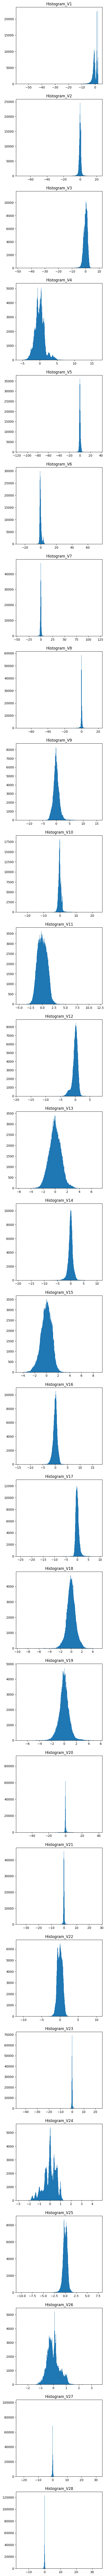

In [4]:
# plotting histograms of the features V

fig, axes = plt.subplots(nrows=28,ncols=1, figsize=(5, 150))

for i in range (28):
    x=np.array(data)[:,i+1]
    axes[i].hist(x,bins=500)
    axes[i].set_title('Histogram_V'+str(i+1))


* **Features v1,v2,v4,v6,v12,v24 and v26 don't seem to be normally distributed**.
* **Assuming these won't affect further analysis, let' assume them to be normally distributed.**

Text(0.5, 1.0, 'Amount')

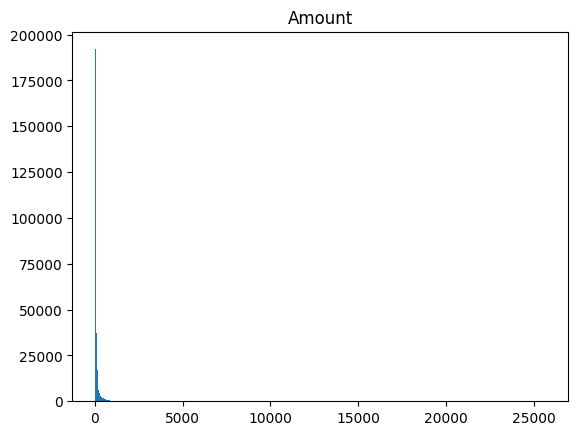

In [5]:
# Histogram of amount 

plt.hist(data['Amount'],bins=500)
plt.title('Amount')

# **Anamoly detection using multivariate gaussian.**

In [6]:
# creating X_train and X_validation
# X_train doesn't contain fraud transactions 

X_safe=data[data['Class']==0]
X_fraud=data[data['Class']==1]
X_concat=pd.concat([X_safe, X_fraud])

y_train=X_concat[['Class']][:250000]
y_val=X_concat[['Class']][-34807:]

X_train=(X_concat[:250000]).drop(['Class','Time'], axis=1)
X_val=(X_concat[-34807:]).drop(['Class','Time'], axis=1)

# converting into numpy array

X_train=np.array(X_train)
X_val=np.array(X_val)
y_train=np.array(y_train)
y_val=np.array(y_val)

In [7]:
def estimate_gaussian(X): 
    """
    Calculates mean and std of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        std (ndarray): (n,) Variance of all features
    """

    m, n = X.shape
    
    mu=np.zeros(n)
    var=np.zeros(n)
    std=np.zeros(n)
    
    
    for j in range (n):
        mu[j]=(sum(X[:,j]))/m
        term=0
        for i in range (m):
            term=term+(X[i,j]-mu[j])**2
        var[j]=term/m
        std[j]=np.sqrt(var[j])
            
            
            
    return mu, std

In [8]:
# Estimate mean and std of each feature in X_train
mu, std = estimate_gaussian(X_train)              

print("Mean of each feature:", mu)
print("Standard deviation of each feature:", std)

Mean of each feature: [-2.69629689e-02 -2.70774174e-02  1.13241477e-01  1.58935069e-02
 -3.09086629e-02  2.06706457e-02 -5.28877836e-03  8.31771996e-04
  5.86793108e-03  9.93756605e-03  3.34562903e-02 -1.68935336e-02
  5.66119845e-03  2.96134456e-02  2.58846306e-02  5.42676887e-03
  2.24749490e-02 -9.90702584e-03 -5.13344736e-03  3.74531168e-03
 -3.14983848e-03 -1.05857932e-02 -6.05385843e-03  9.24037856e-04
  2.08738819e-02  1.37774324e-03 -9.31672736e-04  6.54736936e-04
  9.06250804e+01]
Standard deviation of each feature: [  1.92724257   1.6523849    1.44210092   1.39727325   1.34904044
   1.32371508   1.16017822   1.15693042   1.10214395   1.03755479
   1.01018755   0.9746223    1.00995635   0.89868606   0.92705115
   0.84790349   0.7517748    0.82786196   0.81566426   0.7806612
   0.71861221   0.71424864   0.6344247    0.60633222   0.51468095
   0.48537969   0.39697669   0.33232625 251.48229911]


In [9]:
def multivariate_gaussian(X, mu, std):
    
    p_multi=np.zeros(X.shape[0])
    
    for i in range(X.shape[0]):
        p=1
        for j in range(X.shape[1]):
            p=p*(1/(np.sqrt(np.pi*2)))*(1/std[j])*np.exp((-(X[i,j]-mu[j])**2)/(2*(std[j])**2))
        p_multi[i]=p
  
    return p_multi
    

In [10]:
# Returns the density of the multivariate normal
# at each data point (row) of X_val
p_multi = multivariate_gaussian(X_val, mu, std)

In [11]:
def select_threshold(y_val, p_multi): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_multi) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_multi (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    best_recall=0
    best_precision=0
    
    step_size = (max(p_multi) - min(p_multi)) / 1000
    

    
    for epsilon in np.arange(min(p_multi), max(p_multi), step_size):
        fp=0
        tp=0
        fn=0
        
        y_hat=np.zeros(len(y_val))
        
        for i in range (len(y_val)):
            if p_multi[i] <= epsilon:
                y_hat[i]=1
                if y_val[i]==1:
                    tp=tp+1
                if y_val[i]==0:
                    fp=fp+1
            
            if p_multi[i] > epsilon:
                y_hat[i]=0
                if y_val[i]==1:
                    fn=fn+1
        
        recall=tp/(fn+tp)
        precision=tp/(fp+tp)
        F1=(2*recall*precision)/(recall+precision)
        
        if F1> best_F1:
            best_F1 = F1
            best_epsilon = epsilon
            best_recall=recall
            best_precision=precision
        
    return best_epsilon, best_F1, best_recall, best_precision

In [12]:
e,f1,r,p=select_threshold(y_val, p_multi)

print('best_epsilon is',e)
print('best_F1 is',f1)
print('best_recall is',r)
print('best_precision is ',p)

best_epsilon is 0.0
best_F1 is 0.36569579288025894
best_recall is 0.22967479674796748
best_precision is  0.8968253968253969


In [13]:
# confusion matrix and f1 score

def score(e):
    
    y_val_predict=np.zeros(X_val.shape[0])
    
    for i in range (X_val.shape[0]):
        p=1
        for j in range (X_val.shape[1]):
            p=p*(1/(np.sqrt(np.pi*2)))*(1/std[j])*np.exp((-(X_val[i,j]-mu[j])**2)/(2*(std[j])**2))
        if p<=e:
            y_val_predict[i]=1
        if p>e:
            y_val_predict[i]=0
            
    cmd=ConfusionMatrixDisplay(confusion_matrix(y_val,y_val_predict)).plot()
    epsilon=e
    F1=f1_score(y_val,y_val_predict)
    r=recall_score(y_val,y_val_predict)
    p=precision_score(y_val,y_val_predict)
    
    return epsilon,F1,r,p,cmd
       

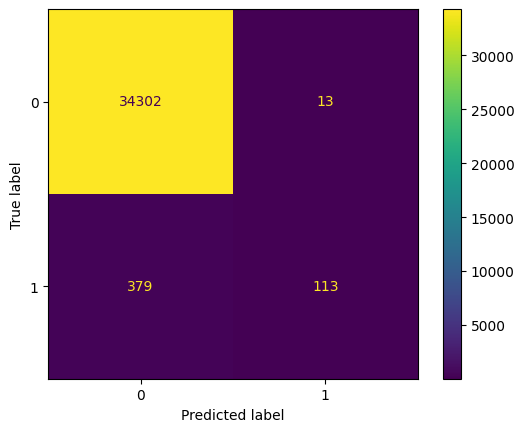

In [14]:
# confusion matrix for best f1 score

e=e
_, _, _, _,cmd = score(e)


**It seems multivariate gaussian approach is not doing that well.**


epsilon 1e-66
F1 0.5909090909090908
recall 0.6077235772357723
precision 0.575


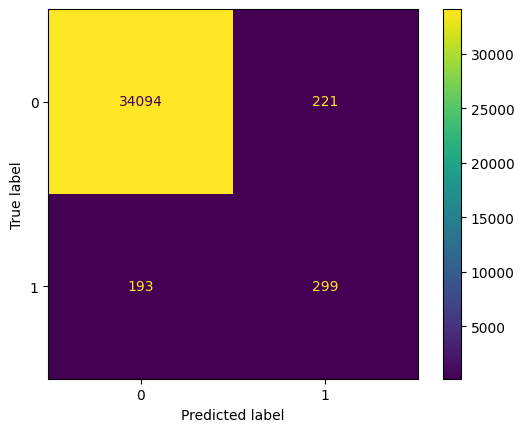

In [15]:
# trying for some other value of e

e=1e-66

epsilon,F1,r,p,cmd=score(e)

print('epsilon',e)
print('F1',F1)
print('recall',r)
print('precision',p)
cmd

**Amongst various values of epsilon, 1e-66 gives somewhat better estimate.**

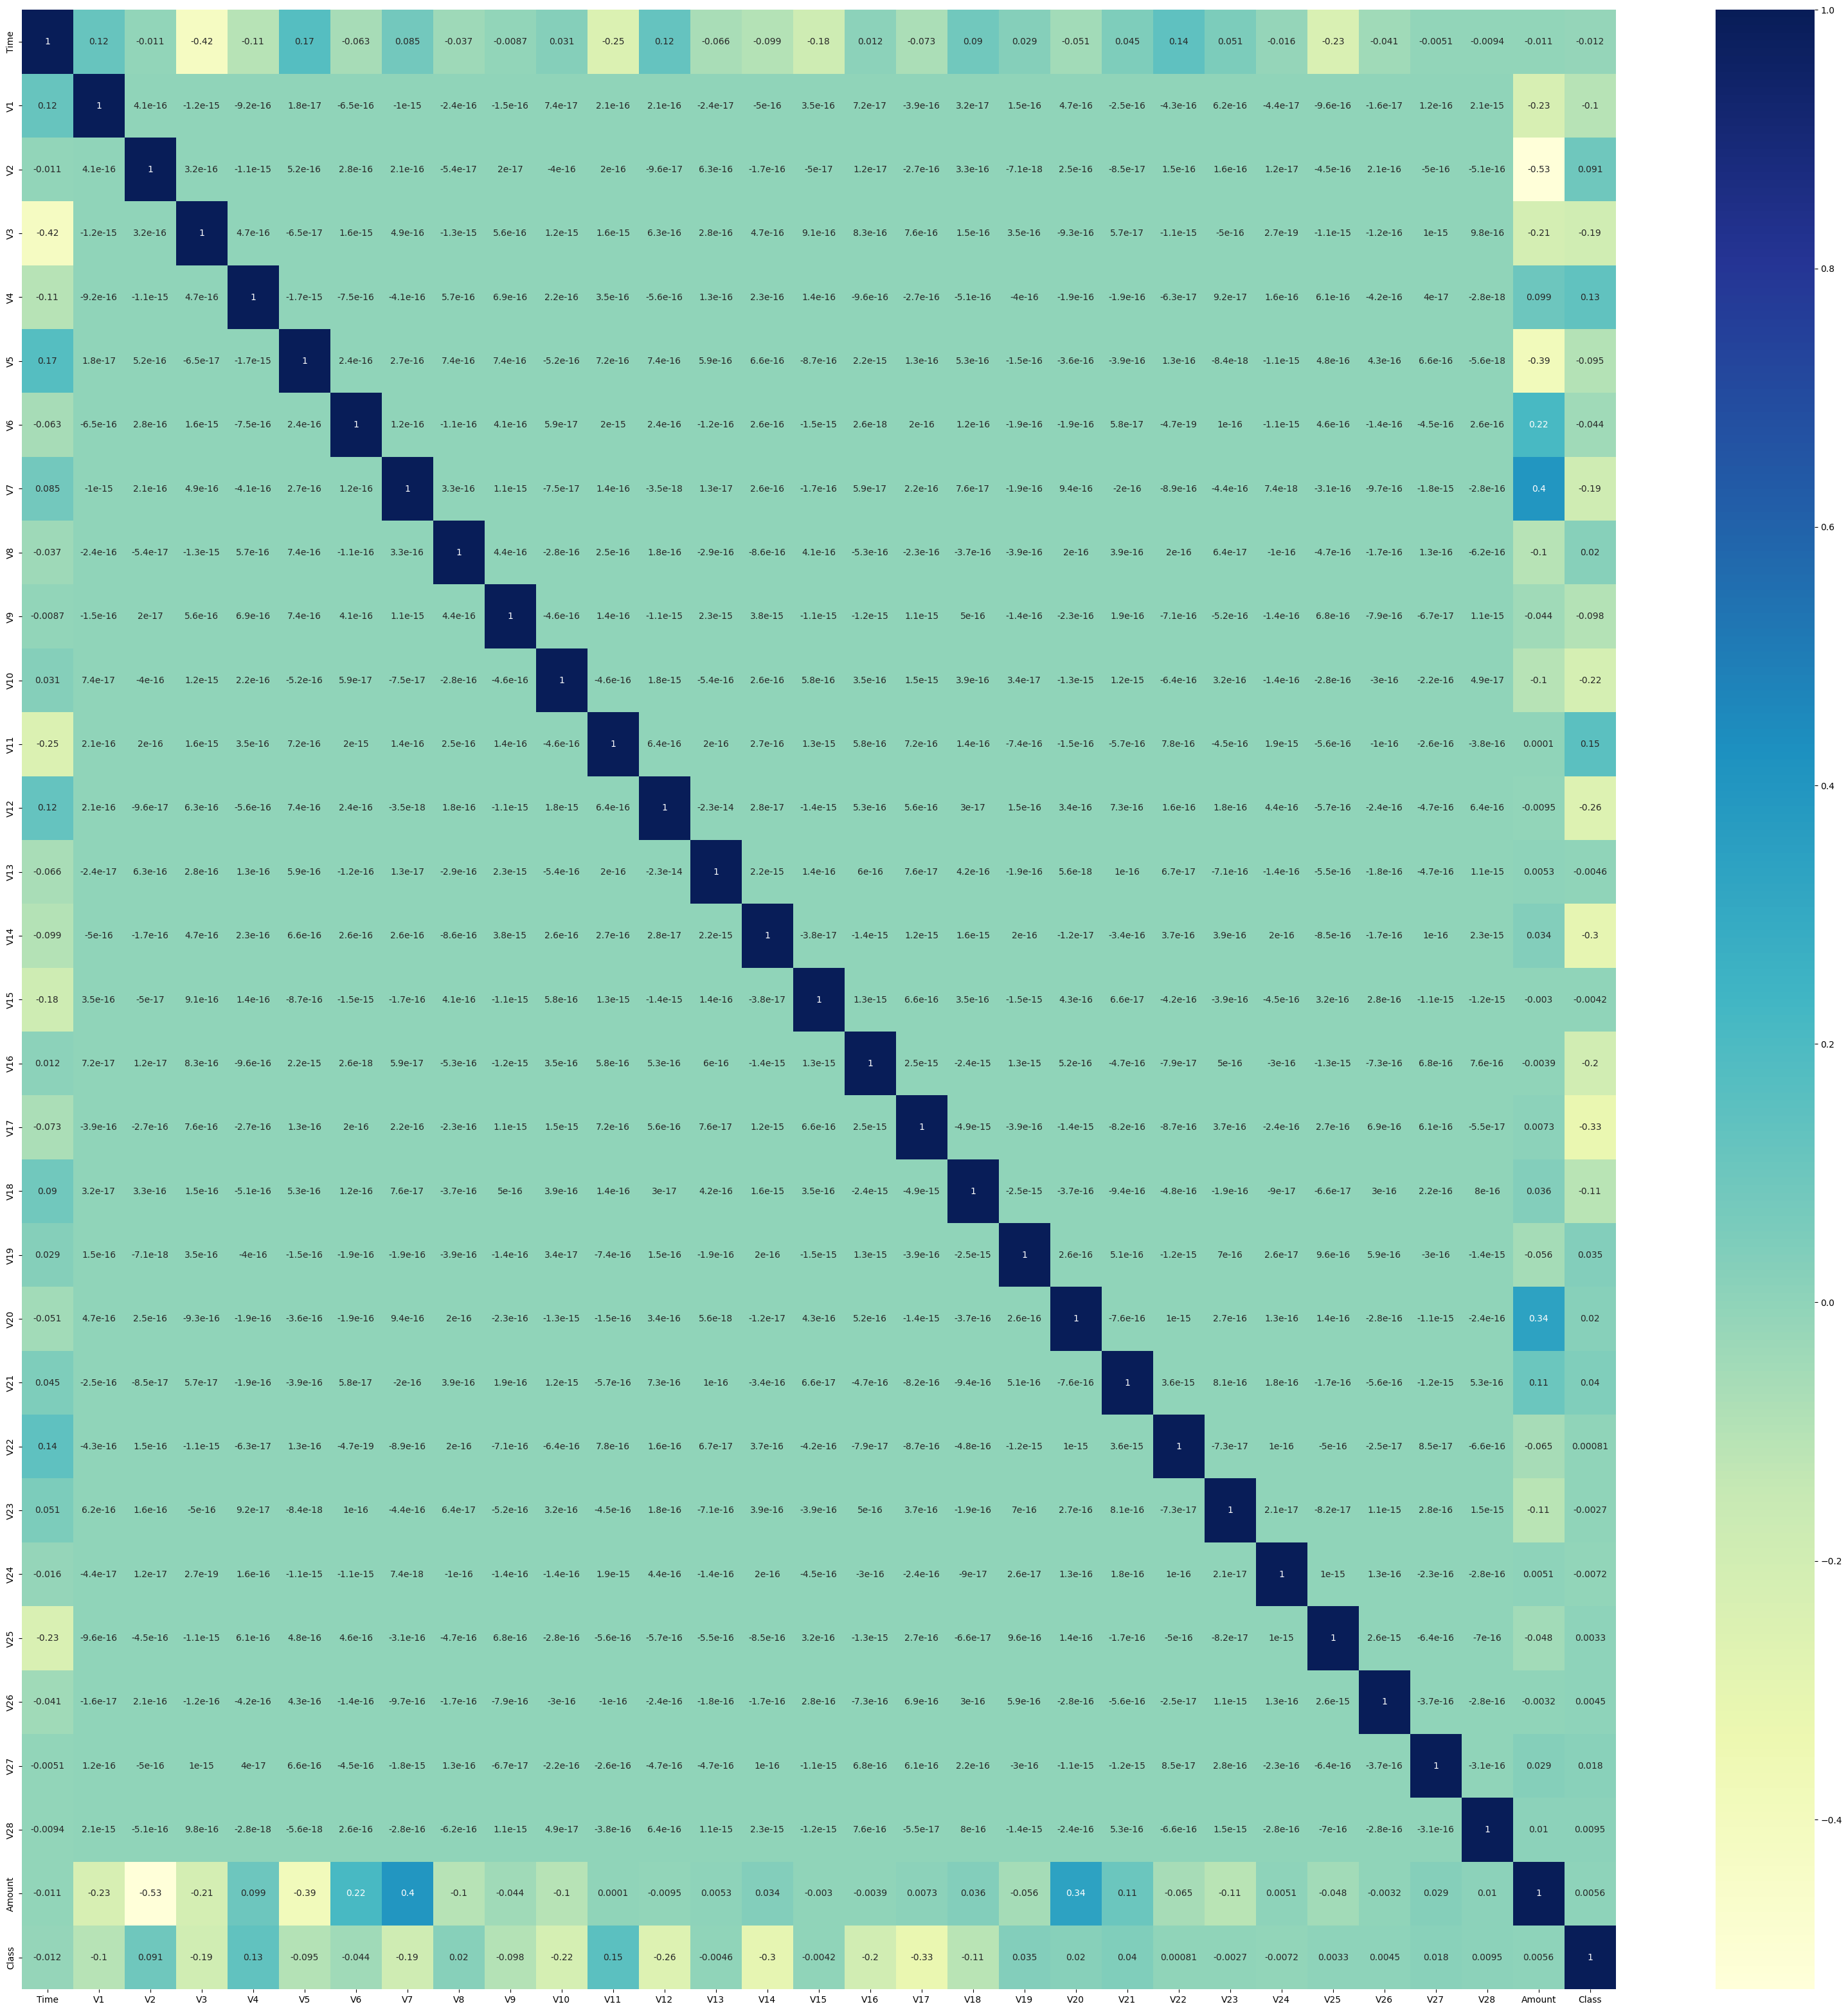

In [16]:
# let's check what features are important 

fig, ax = plt.subplots(figsize=(40,40)) 
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

**It seems features V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18 are most important for predicting class.** 
